In [1]:
da = read.table("./data/m-dec12910.txt", header=T)  # 读取文件

In [2]:
head(da)  # 查看前六行数据

date,dec1,dec2,dec9,dec10
19670131,0.068568,0.080373,0.180843,0.211806
19670228,0.008735,0.011044,0.048767,0.064911
19670331,0.039698,0.035364,0.067494,0.068904
19670428,0.044030,0.037541,0.040785,0.044602
19670531,-0.050631,-0.036233,-0.002191,0.000295
19670630,0.014998,0.018870,0.102075,0.118678


In [3]:
d10 = da$dec10

ts()生成时间序列，frequency=1表示年度数据，frequency=4表示季度数据，frequency=12表示月度数据

In [4]:
dec10 = ts(d10, frequency=12, start=c(1967, 1))

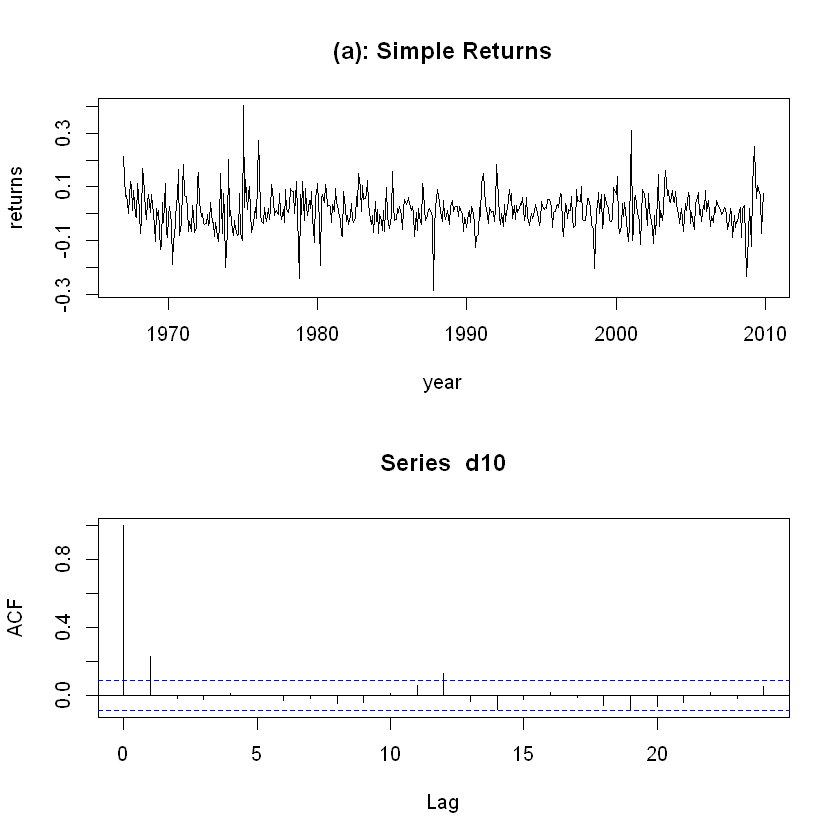

In [5]:
par(mfcol=c(2, 1))
plot(dec10, xlab='year', ylab='returns')
title(main="(a): Simple Returns")
acf(d10, lag=24)

**混成检验**

In [6]:
da = read.table("data/m-ibmsp6709.txt", header=T)
head(da)

date,ibm,sp
19670131,0.075370,0.078178
19670228,0.079099,0.001963
19670331,0.048837,0.039410
19670428,0.100887,0.042239
19670531,-0.035234,-0.052441
19670630,0.067024,0.017512


In [7]:
ibm = da$ibm
lnibm = log(ibm + 1)  # transfer to log returns

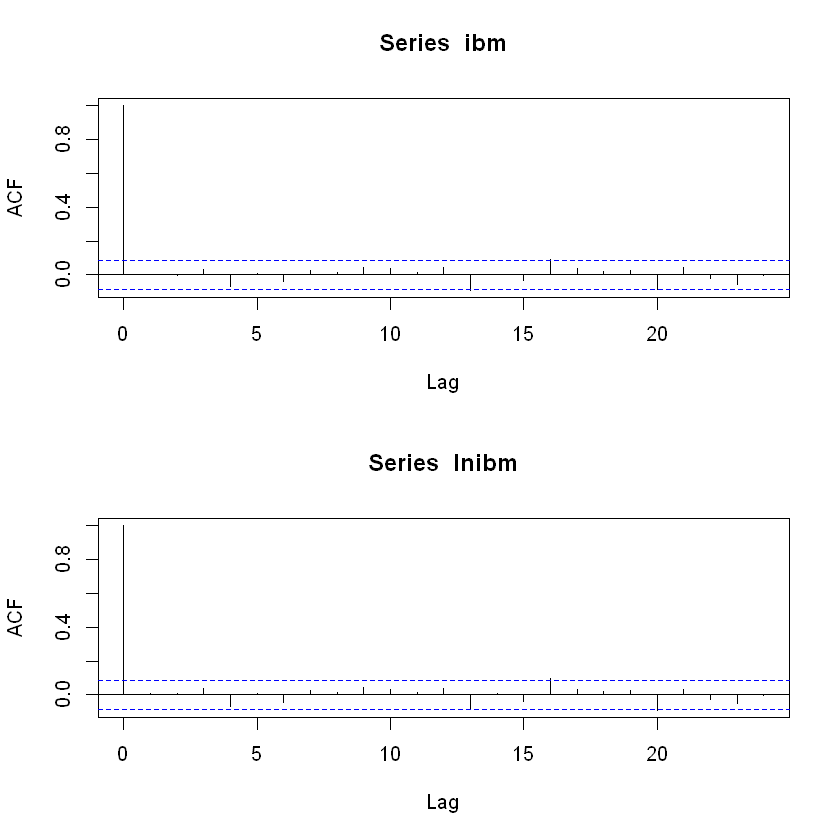

In [8]:
par(mfcol=c(2, 1))
acf(ibm, lag=24)
acf(lnibm, lag=24)

In [9]:
Box.test(ibm, lag=12, type='Ljung')


	Box-Ljung test

data:  ibm
X-squared = 7.5666, df = 12, p-value = 0.818


In [10]:
Box.test(lnibm, lag=12, type='Ljung')


	Box-Ljung test

data:  lnibm
X-squared = 7.4042, df = 12, p-value = 0.8298


In [11]:
Box.test(ibm, lag=24, type='Ljung')


	Box-Ljung test

data:  ibm
X-squared = 25.487, df = 24, p-value = 0.3797


In [12]:
Box.test(lnibm, lag=24, type='Ljung')


	Box-Ljung test

data:  lnibm
X-squared = 25.39, df = 24, p-value = 0.3848


**简单自回归模型**

In [13]:
da = read.table("data/q-gnp4710.txt", header=T)
head(da)

Year,Mon,Dat,VALUE
1947,1,1,238.1
1947,4,1,241.5
1947,7,1,245.6
1947,10,1,255.6
1948,1,1,261.7
1948,4,1,268.7


In [14]:
G = da$VALUE        # GNP序列
LG = log(G)             # GNP序列的对数序列
gnp = diff(LG)         # GNP序列的增长率

In [15]:
dim(da)

[1] 253   4

In [16]:
tdx = c(1: 253) / 4 + 1947  # create the time index

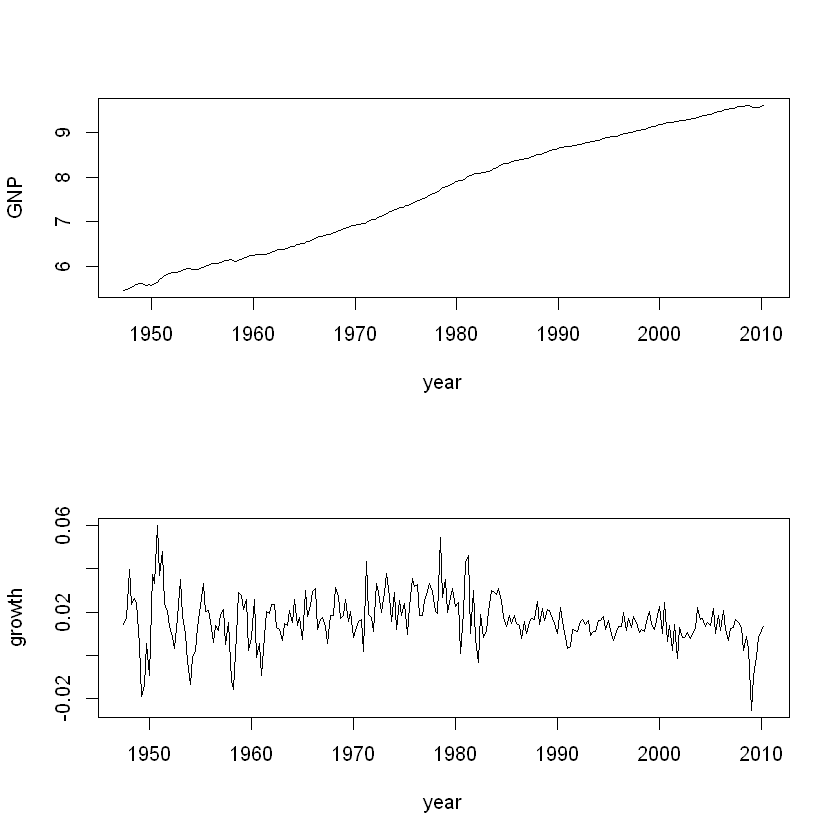

In [18]:
par(mfcol=c(2, 1))
plot(tdx, LG, xlab='year', ylab='GNP', type='l')
plot(tdx[2:253], gnp, type='l', xlab='year', ylab='growth')

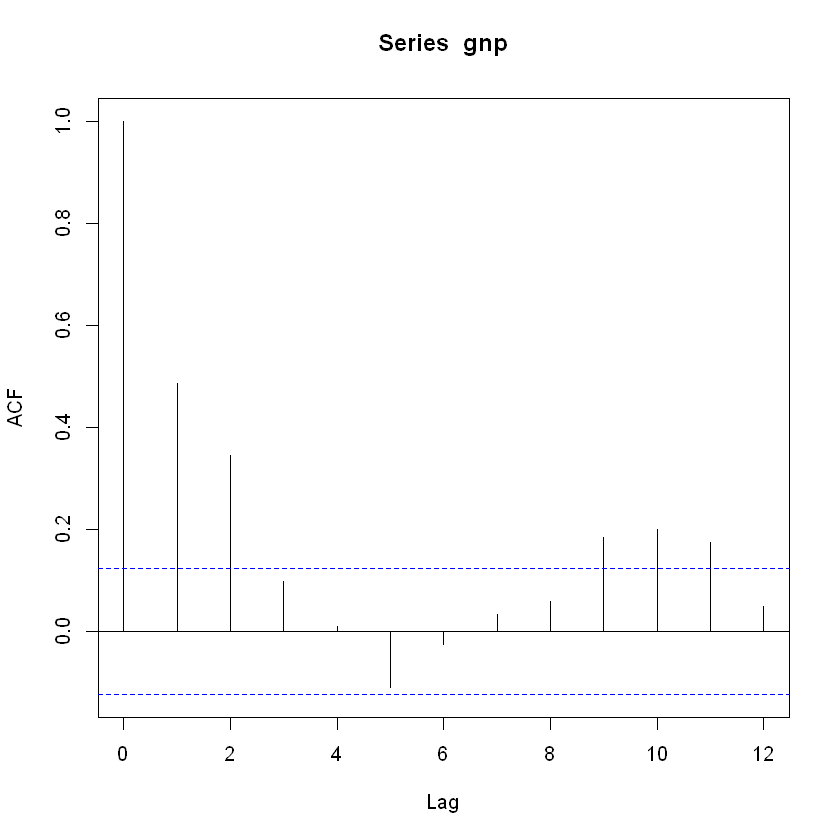

In [19]:
acf(gnp, lag=12)

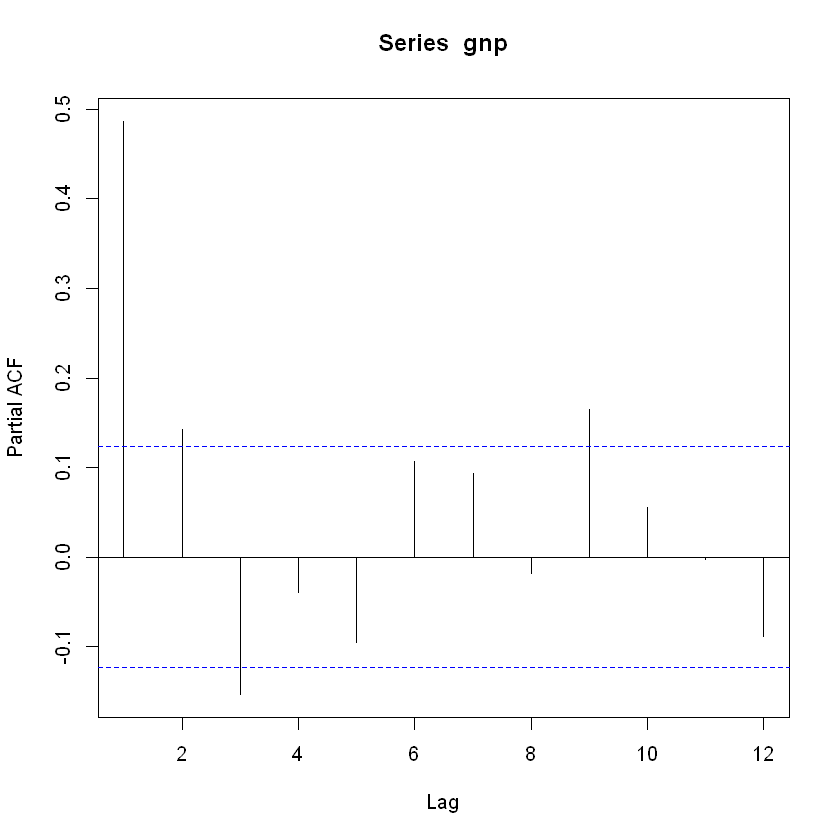

In [20]:
pacf(gnp, lag=12)

In [21]:
m1 = arima(gnp, order=c(3, 0, 0))
m1


Call:
arima(x = gnp, order = c(3, 0, 0))

Coefficients:
         ar1     ar2      ar3  intercept
      0.4386  0.2063  -0.1559     0.0163
s.e.  0.0620  0.0666   0.0626     0.0012

sigma^2 estimated as 9.549e-05:  log likelihood = 808.56,  aic = -1607.12

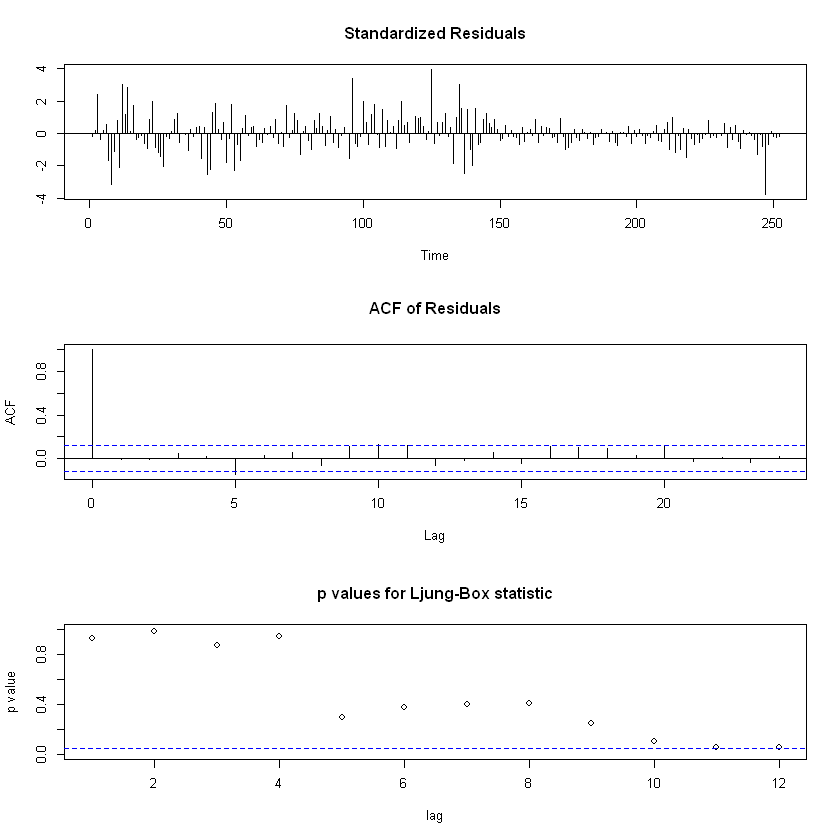

In [22]:
tsdiag(m1, gof=12)

In [23]:
m1$coef

ar1         ar2         ar3   intercept 
 0.43857261  0.20631922 -0.15594606  0.01630425

In [24]:
p1 = c(1, -m1$coef[1:3])

In [25]:
r1 = polyroot(p1)
r1

[1]  1.616116+0.864212i -1.909216+0.000000i  1.616116-0.864212i

In [26]:
Mod(r1)

[1] 1.832674 1.909216 1.832674

In [27]:
k = 2 * pi / acos(1.616116/1.832674)
k

[1] 12.79523

**信息准则**

In [28]:
mm1 = ar(gnp, method='mle')  # ar命令已经对AIC值进行了调整，使得AIC的最小值为0
mm1


Call:
ar(x = gnp, method = "mle")

Coefficients:
      1        2        3        4        5        6        7        8  
 0.4318   0.1985  -0.1180   0.0189  -0.1607   0.0900   0.0615  -0.0814  
      9  
 0.1940  

Order selected 9  sigma^2 estimated as  8.918e-05

In [29]:
mm1$order

[1] 9

In [30]:
names(mm1)

[1] "order"        "ar"           "var.pred"     "x.mean"       "aic"         
 [6] "n.used"       "n.obs"        "order.max"    "partialacf"   "resid"       
[11] "method"       "series"       "frequency"    "call"         "asy.var.coef"

In [31]:
print(mm1$aic, digits=3)

     0      1      2      3      4      5      6      7      8      9     10 
77.767 11.915  8.792  4.669  6.265  5.950  5.101  4.596  6.541  0.000  0.509 
    11     12 
 2.504  2.057 


In [32]:
aic = mm1$aic
length(aic)

[1] 13

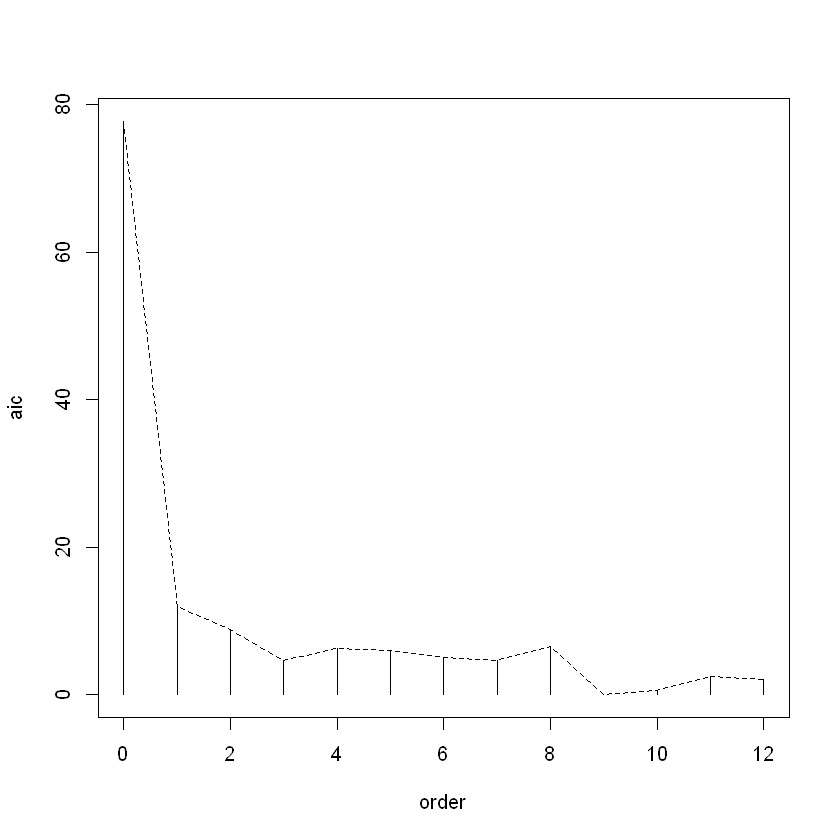

In [33]:
plot(c(0:12), aic, type="h", xlab="order", ylab="aic")
lines(0:12, aic, lty=2)

**模型检验**

检查模型的充分性，如果模型是充分的，则其残差序列是白噪声。残差的样本自相关函数和Liung-Box统计量可用来检验$\hat{a}_t$与白噪声的接近程度。

In [34]:
vw = read.table("data/m-ibm3dx2608.txt", header=T)[, 3]

In [35]:
m3 = arima(vw, order=c(3, 0, 0))  # 构建AR(3)模型
m3


Call:
arima(x = vw, order = c(3, 0, 0))

Coefficients:
         ar1      ar2      ar3  intercept
      0.1158  -0.0187  -0.1042     0.0089
s.e.  0.0315   0.0317   0.0317     0.0017

sigma^2 estimated as 0.002875:  log likelihood = 1500.86,  aic = -2991.73

In [36]:
sqrt(m3$sigma2)  # Compute the standard error of  residuals

[1] 0.0536189

In [37]:
Box.test(m3$residuals, lag=12, type="Ljung")  # 白噪声检验


	Box-Ljung test

data:  m3$residuals
X-squared = 16.352, df = 12, p-value = 0.1756


In [38]:
Box.test(m3$residuals, lag=9, type="Ljung")


	Box-Ljung test

data:  m3$residuals
X-squared = 15.506, df = 9, p-value = 0.07795


固定$\phi_2$为0

In [39]:
m3 = arima(vw, order=c(3, 0, 0), fixed=c(NA, 0, NA, NA), transform.pars=F)
m3


Call:
arima(x = vw, order = c(3, 0, 0), transform.pars = F, fixed = c(NA, 0, NA, NA))

Coefficients:
         ar1  ar2      ar3  intercept
      0.1136    0  -0.1063     0.0089
s.e.  0.0313    0   0.0315     0.0017

sigma^2 estimated as 0.002876:  log likelihood = 1500.69,  aic = -2993.38

In [40]:
Box.test(m3$residuals, lag=12, type="Ljung")


	Box-Ljung test

data:  m3$residuals
X-squared = 16.828, df = 12, p-value = 0.1562


## 简单移动平均模型

MA(q)模型的为
$$
x_t=c_0+a_t-\theta_1a_{t-1}-\cdots-\theta_qa_{t-q}
$$
或$x_t=c_0+(1-\theta_1B-\cdots-\theta_qB^q)a_t$，其中$q>0$       
对MA(q)模型，其ACF在间隔q时不为0，但对$l>q$，$\rho_l=0$。因此，MA(q)序列只与前q个滞后值线性序列相关，模型的ACF在间隔为q以后是截尾的。

In [41]:
da = read.table("data/m-ibm3dx2608.txt", head=T)
head(da)

date,ibmrtn,vwrtn,ewrtn,sprtn
19260130,-0.010381,0.000724,0.023174,0.022472
19260227,-0.024476,-0.033374,-0.053510,-0.043956
19260331,-0.115591,-0.064341,-0.096824,-0.059113
19260430,0.089783,0.038358,0.032946,0.022688
19260528,0.036932,0.012172,0.001035,0.007679
19260630,0.068493,0.056888,0.050487,0.043184


In [42]:
ew = da$ewrtn
m1 = arima(ew, order=c(0, 0, 9))  # 建立MA(9)模型
m1


Call:
arima(x = ew, order = c(0, 0, 9))

Coefficients:
         ma1     ma2      ma3      ma4     ma5      ma6     ma7      ma8
      0.2144  0.0374  -0.1203  -0.0425  0.0232  -0.0302  0.0482  -0.0276
s.e.  0.0316  0.0321   0.0328   0.0336  0.0319   0.0318  0.0364   0.0354
         ma9  intercept
      0.1350     0.0122
s.e.  0.0323     0.0028

sigma^2 estimated as 0.005043:  log likelihood = 1220.86,  aic = -2419.72

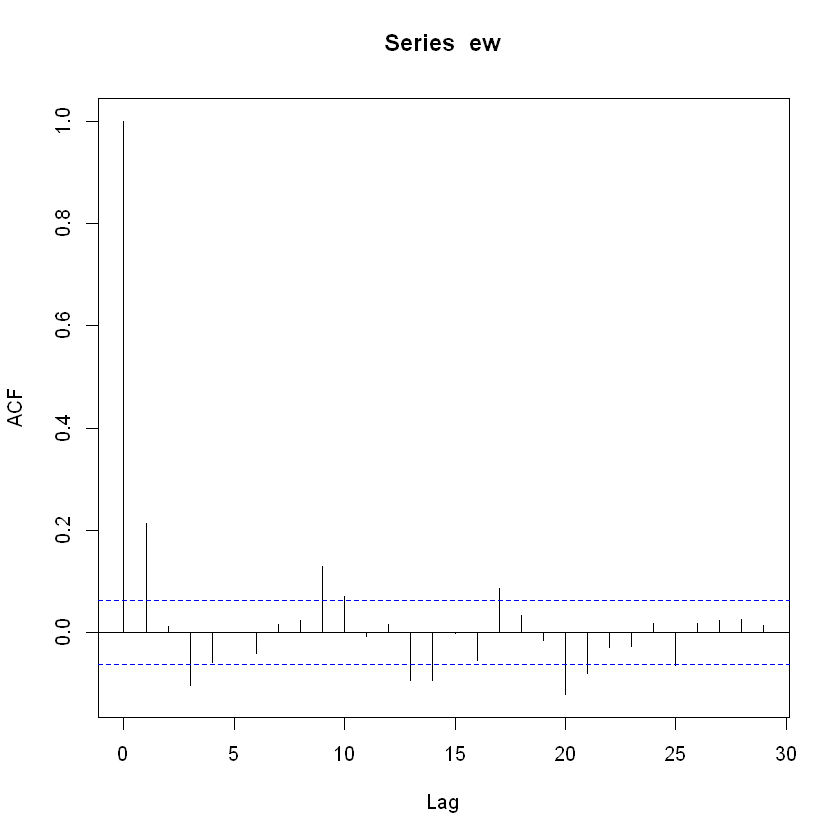

In [43]:
acf(ew)  # 为什么选择MA(9)模型

In [44]:
m1 = arima(ew, order=c(0, 0, 9), fixed=c(NA, 0, NA, 0, 0, 0, 0, 0, NA, NA))
m1


Call:
arima(x = ew, order = c(0, 0, 9), fixed = c(NA, 0, NA, 0, 0, 0, 0, 0, NA, NA))

Coefficients:
         ma1  ma2      ma3  ma4  ma5  ma6  ma7  ma8     ma9  intercept
      0.1909    0  -0.1199    0    0    0    0    0  0.1227     0.0122
s.e.  0.0293    0   0.0338    0    0    0    0    0  0.0312     0.0027

sigma^2 estimated as 0.005097:  log likelihood = 1215.61,  aic = -2421.22

In [45]:
sqrt(m1$sigma2)

[1] 0.07139367

In [46]:
Box.test(m1$residuals, lag=12, type="Ljung")  # model checking


	Box-Ljung test

data:  m1$residuals
X-squared = 17.604, df = 12, p-value = 0.1283


残差是白噪声，模型显著。         
Q1：拟合的MA(9)模型中已经设置了lag=9，为什么在Box检验中还要设置lag，两者有怎么区别？

In [47]:
Box.test(m1$residuals, lag=9, type="Ljung")


	Box-Ljung test

data:  m1$residuals
X-squared = 9.383, df = 9, p-value = 0.4027


In [48]:
m1 = arima(ew[1:986], order=c(0, 0, 9), fixed=c(NA, 0, NA, 0, 0, 0, 0, 0, NA, NA))
m1


Call:
arima(x = ew[1:986], order = c(0, 0, 9), fixed = c(NA, 0, NA, 0, 0, 0, 0, 0, 
    NA, NA))

Coefficients:
         ma1  ma2      ma3  ma4  ma5  ma6  ma7  ma8     ma9  intercept
      0.1844    0  -0.1206    0    0    0    0    0  0.1218     0.0128
s.e.  0.0295    0   0.0338    0    0    0    0    0  0.0312     0.0027

sigma^2 estimated as 0.005066:  log likelihood = 1206.44,  aic = -2402.88

## 简单ARMA模型

ARMA(p, q)模型的平稳性条件与AR(1)模型相同。
一般ARMA(p, q)模型的形式为     
$$
x_t=\phi_0+\sum_{i=1}^p\phi_ix_{t-i}+a_t-\sum_{i=1}^p\theta_ia_{t-i}
$$

In [49]:
da = read.table("data/m-3m4608.txt", header=T)
head(da)

date,rtn
19460228,-0.077922
19460330,0.018592
19460430,-0.100000
19460531,0.209877
19460628,0.005128
19460731,0.076531


In [50]:
mmm = log(da$rtn + 1)

In [51]:
library(TSA)


Attaching package: 'TSA'

The following objects are masked from 'package:stats':

    acf, arima

The following object is masked from 'package:utils':

    tar



In [52]:
m1 = eacf(mmm, 6, 12)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12
0 o o x o o x o o o x o  x  o 
1 x o x o o x o o o o o  x  o 
2 x x x o o x o o o o o  o  o 
3 x x x o o o o o o o o  o  o 
4 x o x o o o o o o o o  o  o 
5 x x x o x o o o o o o  o  o 
6 x x x x x o o o o o o  o  o 


EACF表明公司股票的月对数收益率服从一个ARMA(0, 0)模型，也就是一个白噪声序列。

**单位根检验**       
为了检验资产的对数价格$p_i$是否服从随机游动或带漂移的随机游动，我们利用以下两个模型   
$$
p_t=\phi_1p_{t-1}+e_t \\
p_t=\phi_0+\phi_1p_{t-1}+e_t
$$
原假设$H_0:\phi_1=1$，备择假设$\phi_1<1$

In [53]:
library(fUnitRoots)  # 单位根检验的包

Loading required package: timeDate

Attaching package: 'timeDate'

The following objects are masked from 'package:TSA':

    kurtosis, skewness

Loading required package: timeSeries
Loading required package: fBasics


In [54]:
da = read.table("data/q-gdp4708.txt", header=T)
head(da)

year,mon,day,gdp
1947,1,1,237.2
1947,4,1,240.5
1947,7,1,244.6
1947,10,1,254.4
1948,1,1,260.4
1948,4,1,267.3


In [55]:
gdp = log(da$gdp)
m1 = ar(diff(gdp), method='mle')  # 选择准则
m1$order

[1] 10

In [56]:
adfTest(gdp, lags=10, type=c("c"))


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 10
  STATISTIC:
    Dickey-Fuller: -1.6109
  P VALUE:
    0.4569 

Description:
 Thu Nov 21 09:10:06 2019 by user: PC


单位根假设不能被拒绝。

In [57]:
da = read.table("data/d-sp55008.txt", header=T)
head(da)

year,mon,day,open,high,low,close,volume,adjclose
1950,1,3,16.66,16.66,16.66,16.66,1260000,16.66
1950,1,4,16.85,16.85,16.85,16.85,1890000,16.85
1950,1,5,16.93,16.93,16.93,16.93,2550000,16.93
1950,1,6,16.98,16.98,16.98,16.98,2010000,16.98
1950,1,9,17.08,17.08,17.08,17.08,2520000,17.08
1950,1,10,17.03,17.03,17.03,17.03,2160000,17.03


In [58]:
sp5 = log(da$close)
m2 = ar(diff(sp5), method='mle')
m2$order

[1] 2

In [59]:
adfTest(sp5, lags=2, type=c("ct"))


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 2
  STATISTIC:
    Dickey-Fuller: -2.0179
  P VALUE:
    0.5708 

Description:
 Thu Nov 21 09:10:10 2019 by user: PC


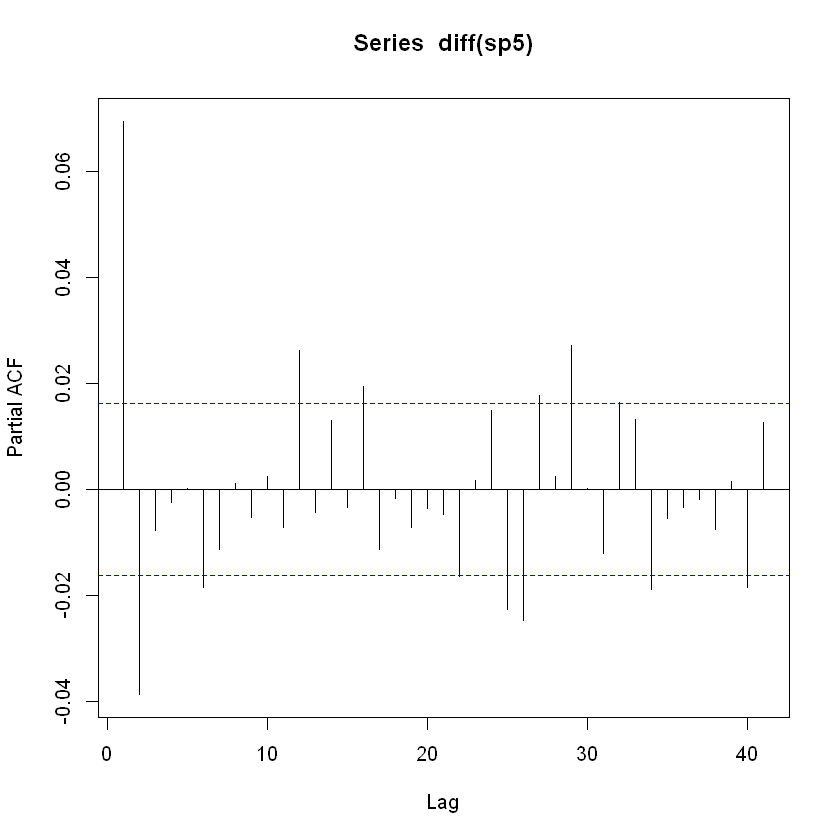

In [60]:
pacf(diff(sp5))

Q2：为什么基于PACF，选择p=15?   
Q3：type=c("c")和type=c("ct")什么意思？            
P71

In [61]:
adfTest(sp5, lags=15, type=c("ct"))  # Based on PACF


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 15
  STATISTIC:
    Dickey-Fuller: -1.9946
  P VALUE:
    0.5807 

Description:
 Thu Nov 21 09:10:13 2019 by user: PC


单位根的原假设不能被拒绝。

In [62]:
dsp5 = diff(sp5)
tdx = c(1:length(dsp5))
m3 = arima(dsp5, order=c(2, 0, 0), xreg = tdx)
m3


Call:
arima(x = dsp5, order = c(2, 0, 0), xreg = tdx)

Coefficients:
         ar1      ar2  intercept  xreg
      0.0721  -0.0387      4e-04     0
s.e.  0.0083   0.0083      2e-04     0

sigma^2 estimated as 8.068e-05:  log likelihood = 48286.95,  aic = -96565.91

Q4：xreg有什么作用？

In [63]:
da = read.table("data/d-vix0810.txt", header=T)

In [64]:
vix = log(da$Close)
length(vix)

[1] 496

In [68]:
library(xts)

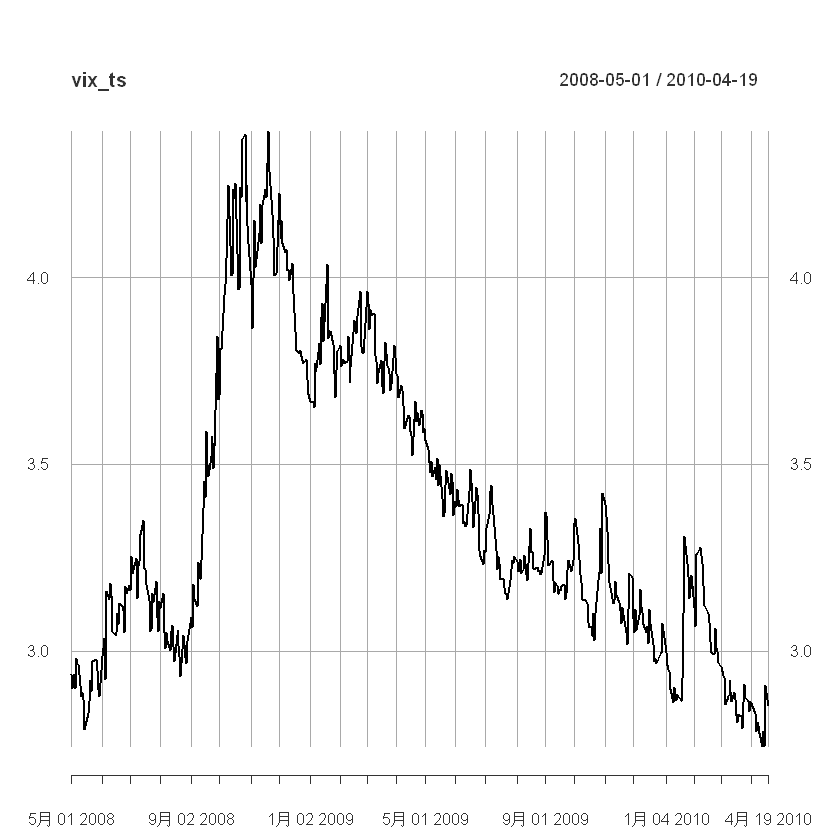

In [69]:
da$date = as.Date(paste(da$Year, da$Day, da$Mon, sep="-"), format="%Y-%m-%d")
vix_ts = xts(x=vix, order.by=da$date)
plot(vix_ts, type='l')

In [70]:
m1 = arima(vix, order=c(0, 1, 1))
m1


Call:
arima(x = vix, order = c(0, 1, 1))

Coefficients:
          ma1
      -0.1629
s.e.   0.0497

sigma^2 estimated as 0.004429:  log likelihood = 638.97,  aic = -1275.94

令$x_t=\ln(\operatorname{VIX}_t)$，拟合的模型为：
$$
(1-B)x_t=(1-0.1629B)a_t,\qquad \hat{\sigma}_a^2=0.004429
$$

In [71]:
Box.test(m1$residuals, lag=10, type="Ljung")


	Box-Ljung test

data:  m1$residuals
X-squared = 14.254, df = 10, p-value = 0.1617


残差的Ljung-Box统计量表明拟合的ARIMA(0, 1, 1)模型时充分的。

**可口可乐公司股票案例**

In [2]:
da = read.table("data/q-ko-earns8309.txt", header=T)
head(da)

pends,anntime,value
19830331,19830426,0.0375
19830630,19830725,0.0492
19830930,19831102,0.0463
19831231,19840214,0.0379
19840331,19840419,0.0425
19840630,19840720,0.0583


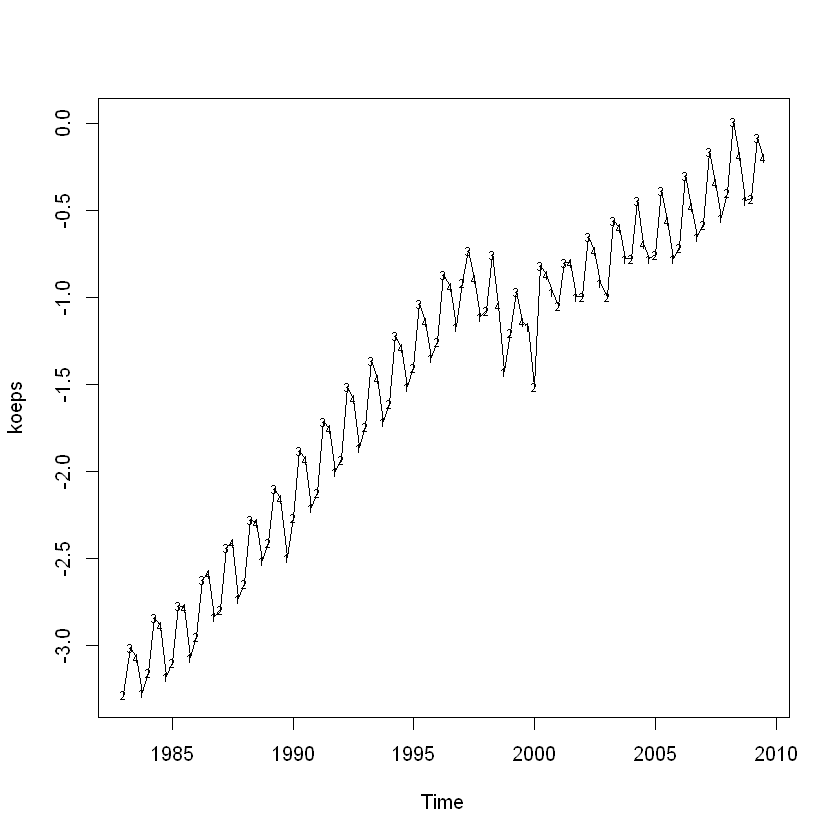

In [3]:
eps = log(da$value)
koeps = ts(eps, frequency=4, start=c(1983, 1))
c1 = c("2", "3", "4", "1")
c2 = c("1", "2", "3", "4")
plot(koeps, type="l")
points(koeps, pch=c1, cex=0.6)

In [4]:
koeps = log(da$value)    # 对数价格
deps = diff(koeps)       # 收益率
sdeps = diff(koeps, 4)   # 季节差分
ddeps = diff(sdeps)

令对数盈利为$x_t$，从下图可看出每股季度对数盈利具有很强的前后相关性，所以考虑$x_t$的一阶差分序列
$$
\Delta x_t = x_t - x_{t-1} = (1-B)x_t
$$
在时间序列分析中，通过差分来得到平稳性是一种惯用手法。

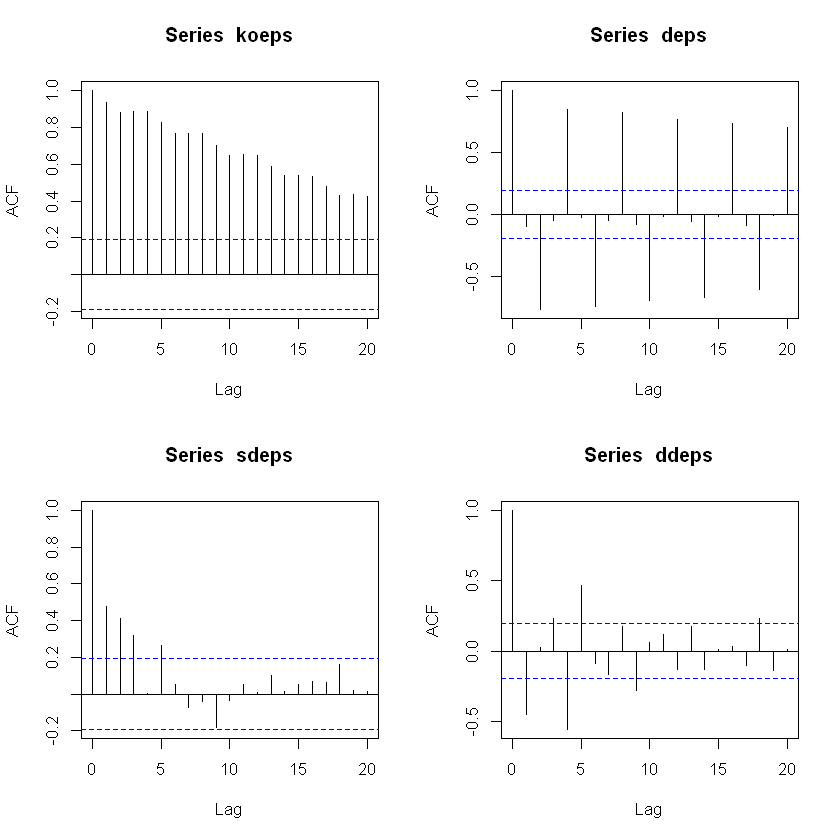

In [5]:
par(mfrow=c(2, 2))
acf(koeps, lag=20)
acf(deps, lag=20)
acf(sdeps, lag=20)
acf(ddeps, lag=20)

从$\Delta x_t$样本的自相关函数图可以看出当滞后阶数是周期4的倍数时样本的自相关函数较大，我们对$\Delta x_t$做季节差分来处理强季节模式。
$$
\Delta_4(\Delta x_t)=(1-B^4)\Delta x_t=\Delta x_t - \Delta x_{t-4}=x_t-x_{t-1}-x_{t-4}+x_{t-5}
$$

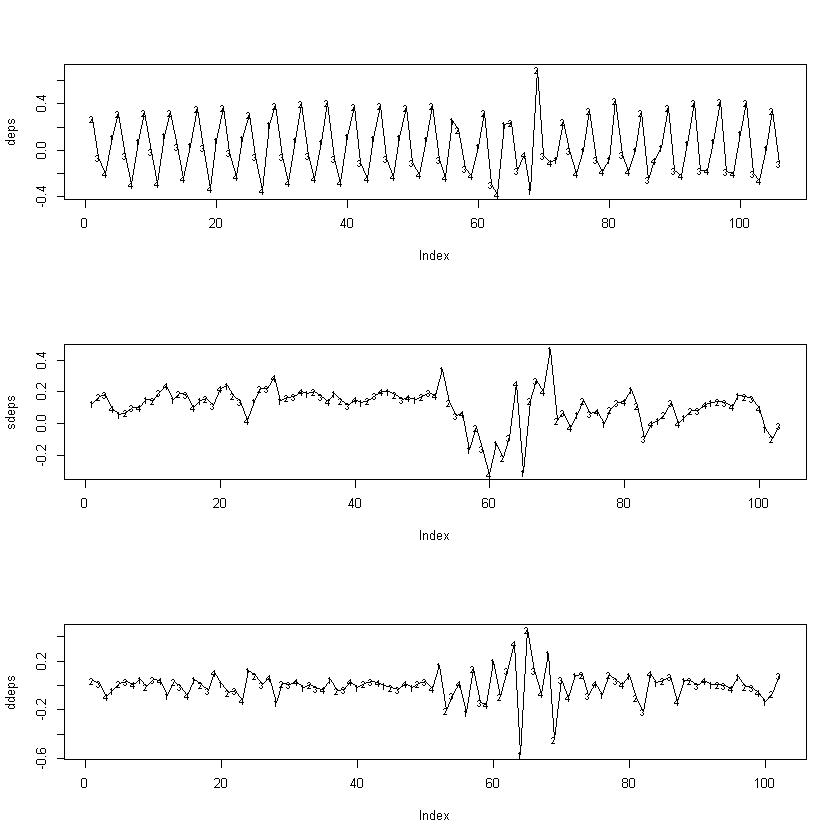

In [76]:
par(mfcol=c(3, 1))
plot(deps, type="l")
points(deps, pch=c1, cex=0.7)
plot(sdeps, type="l")
points(sdeps, pch=c2, cex=0.7)
plot(ddeps, type="l")
points(ddeps, pch=c1, cex=0.7)

从图中我们得知，    
（1）通过差分，成功地移除了数据的向上的趋势；    
（2）差分后的序列显示很强的季节性。     

In [77]:
m1 = arima(koeps, order=c(0, 1, 1), seasonal=list(order=c(0, 1, 1), period=4))
m1


Call:
arima(x = koeps, order = c(0, 1, 1), seasonal = list(order = c(0, 1, 1), period = 4))

Coefficients:
          ma1     sma1
      -0.4096  -0.8203
s.e.   0.0866   0.0743

sigma^2 estimated as 0.00724:  log likelihood = 104.25,  aic = -204.5

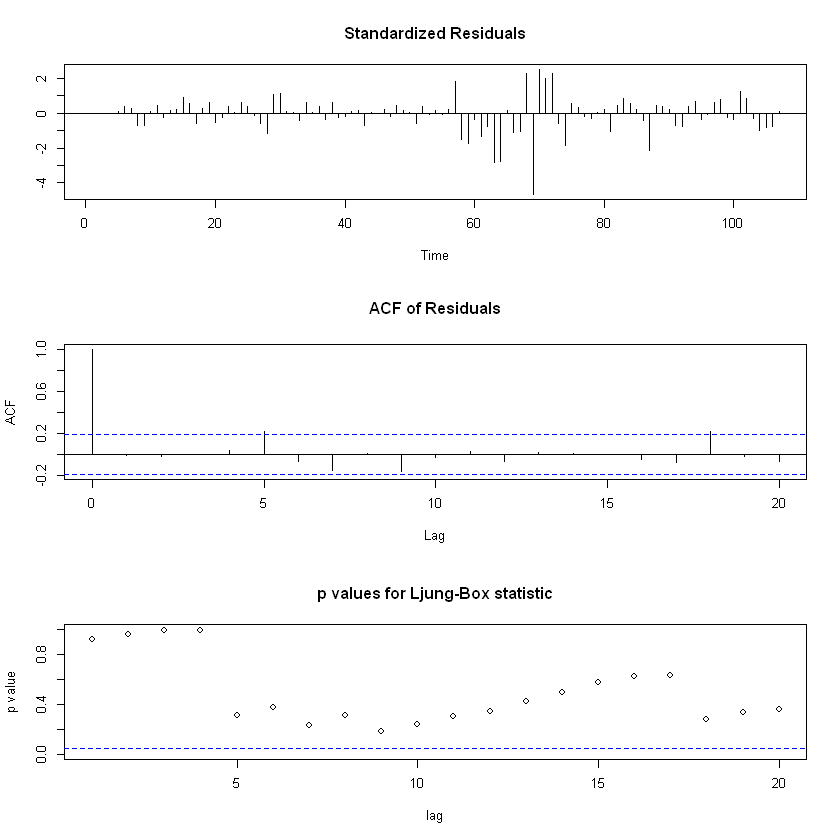

In [78]:
tsdiag(m1, gof=20)  # model checking

In [79]:
Box.test(m1$residuals, lag=12, type="Ljung")


	Box-Ljung test

data:  m1$residuals
X-squared = 13.303, df = 12, p-value = 0.3474


In [80]:
koeps = log(da$value)
length(koeps)

[1] 107

In [81]:
y = koeps[1:100]

In [82]:
m1 = arima(y, order=c(0, 1, 1), seasonal=list(order=c(0, 1, 1), period=4))
m1


Call:
arima(x = y, order = c(0, 1, 1), seasonal = list(order = c(0, 1, 1), period = 4))

Coefficients:
          ma1     sma1
      -0.4209  -0.8099
s.e.   0.0874   0.0767

sigma^2 estimated as 0.007432:  log likelihood = 95.78,  aic = -187.57

In [83]:
pm1 = predict(m1, 7)  # prediction
names(pm1)

[1] "pred" "se"

In [84]:
pred = pm1$pred
se = pm1$se

In [85]:
# Anti-log transformation
ko = da$value
fore = exp(pred + se^2 / 2)
v1 = exp(2 * pred + se^2) * (exp(se^2) - 1)
s1 = sqrt(v1)
eps = ko[80:107]
length(eps)

[1] 28

In [86]:
tdx = (c(1:28) + 3) / 4 + 2002
upp = c(ko[100], fore + 2 * s1)
low = c(ko[100], fore - 2 * s1)
min(low, eps)

[1] 0.37

In [87]:
max(upp, eps)

[1] 1.267623

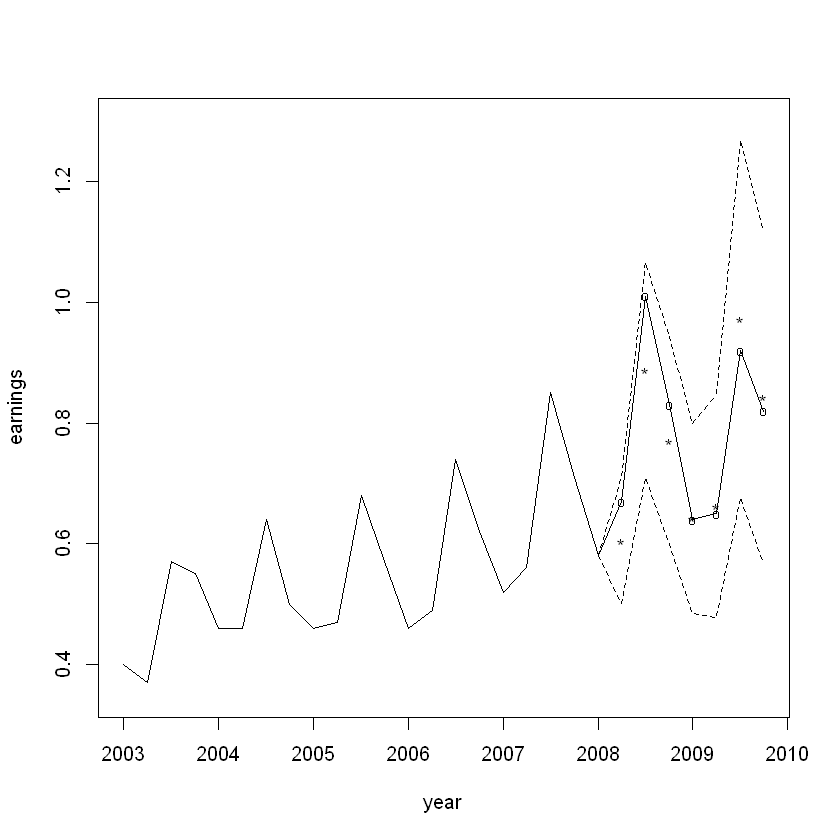

In [88]:
plot(tdx, eps, xlab="year", ylab="earnings", type="l", ylim=c(0.35, 1.3))
points(tdx[22:28], fore, pch="*")
lines(tdx[21:28], upp, lty=2)
lines(tdx[21:28], low, lty=2)
points(tdx[22:28], ko[101:107], pch="o", cex=0.7)

### 季节哑变量

对于季度数据，哑变量分别代表春季、夏季、秋季和冬季。

In [6]:
da = read.table("data/m-deciles08.txt", header=T)
head(da)

date,CAP1RET,CAP2RET,CAP9RET,CAP10RET
19700130,0.054383,-0.004338,-0.073082,-0.076874
19700227,0.020264,0.020155,0.064185,0.059512
19700331,-0.031790,-0.028090,-0.004034,-0.001327
19700430,-0.184775,-0.193004,-0.115825,-0.091112
19700529,-0.088189,-0.085342,-0.085565,-0.053193
19700630,-0.059476,-0.085212,-0.046605,-0.048133


In [17]:
d1 = da[, 2]
jan = rep(c(1, rep(0, 11)), 39)  # Create January dummy
m1 = lm(d1 ~ jan)
summary(m1)


Call:
lm(formula = d1 ~ jan)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30861 -0.03475 -0.00176  0.03254  0.40671 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.002864   0.003333   0.859    0.391    
jan         0.125251   0.011546  10.848   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06904 on 466 degrees of freedom
Multiple R-squared:  0.2016,	Adjusted R-squared:  0.1999 
F-statistic: 117.7 on 1 and 466 DF,  p-value: < 2.2e-16


拟合的模型是$X_t=0.0029+0.1253Jan_t+e_t$

In [19]:
m2 = arima(d1, order=c(1, 0, 0), seasonal=list(order=c(1, 0, 1), period=12))
m2


Call:
arima(x = d1, order = c(1, 0, 0), seasonal = list(order = c(1, 0, 1), period = 12))

Coefficients:
         ar1    sar1     sma1  intercept
      0.1769  0.9882  -0.9144     0.0118
s.e.  0.0456  0.0093   0.0335     0.0129

sigma^2 estimated as 0.004717:  log likelihood = 584.07,  aic = -1158.14

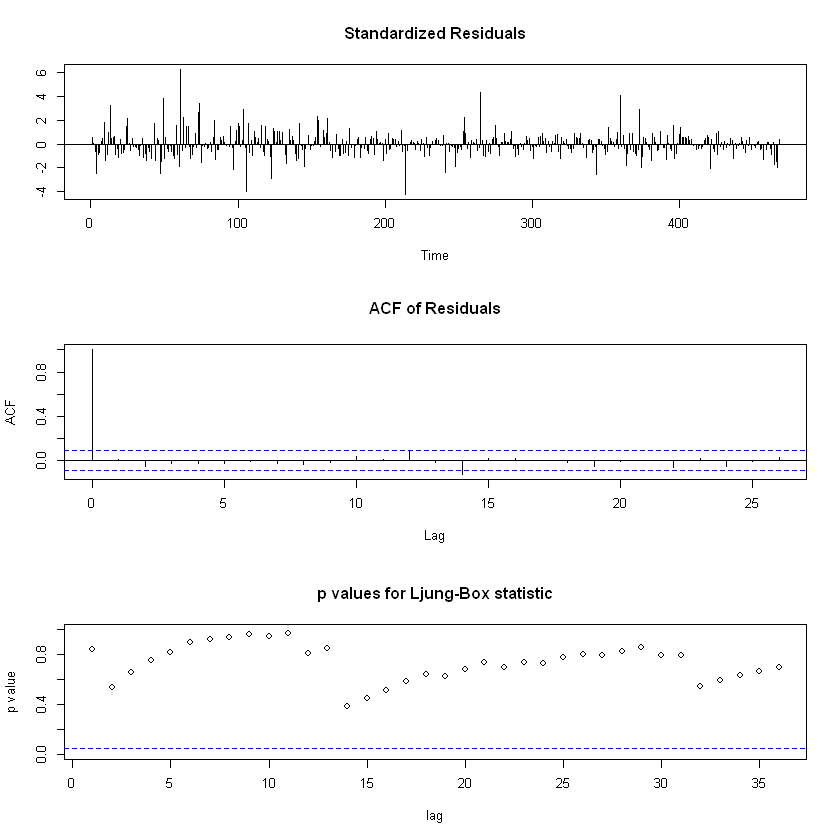

In [20]:
tsdiag(m2, gof=36)

In [21]:
m2 = arima(d1, order=c(1, 0, 0), seasonal=list(order=c(1, 0, 1), period=12), include.mean=F)
m2


Call:
arima(x = d1, order = c(1, 0, 0), seasonal = list(order = c(1, 0, 1), period = 12), 
    include.mean = F)

Coefficients:
         ar1    sar1     sma1
      0.1787  0.9886  -0.9127
s.e.  0.0456  0.0089   0.0335

sigma^2 estimated as 0.00472:  log likelihood = 583.68,  aic = -1159.36

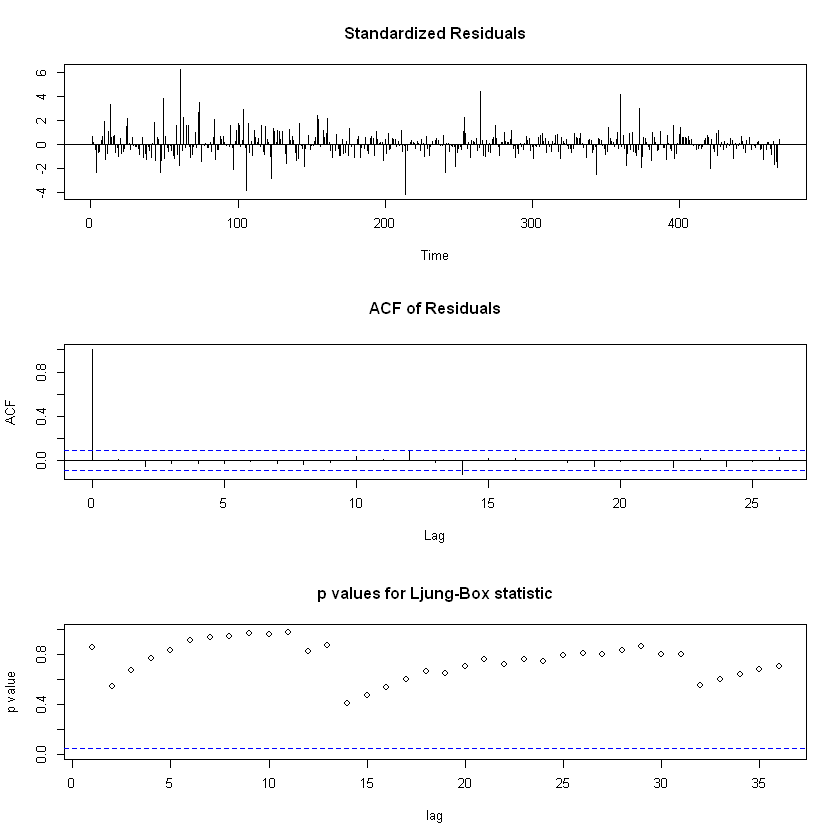

In [22]:
tsdiag(m2, gof=36)

## 带时间序列误差的回归模型

我们考虑如下形式的线性回归：
$$
y_t=\alpha + \beta x_t+e_t
$$
其中$y_t$和$x_t$为两个时间序列，$e_t$表示误差项。
我们通过考虑如下两个美国周利率序列之间的关系来介绍该模型：    
（1）$x_{1t}$：一年期固定期限国库券利率。          
（2）$x_{3t}$：三年期固定期限国库券利率。

In [1]:
r1 = read.table("data/w-gs1yr.txt", header=T)[, 4]
r3 = read.table("data/w-gs3yr.txt", header=T)[, 4]

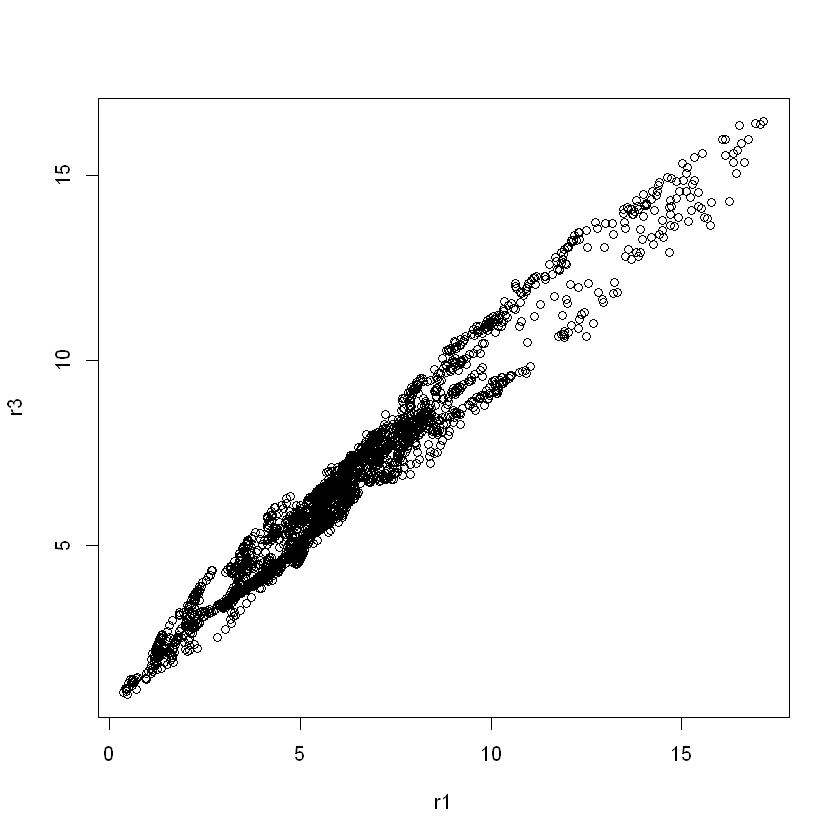

In [12]:
plot(r1, r3)

In [3]:
m1 = lm(r3 ~ r1)
summary(m1)


Call:
lm(formula = r3 ~ r1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.82319 -0.37691 -0.01462  0.38661  1.35679 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.83214    0.02417   34.43   <2e-16 ***
r1           0.92955    0.00357  260.40   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5228 on 2465 degrees of freedom
Multiple R-squared:  0.9649,	Adjusted R-squared:  0.9649 
F-statistic: 6.781e+04 on 1 and 2465 DF,  p-value: < 2.2e-16


由散点图我们可以看出两者存在明显的线性关系，所拟合的模型是
$$
x_{3t}=0.832+0.930x_{1t}+e_t,\qquad \hat{\sigma}_e=0.523
$$
其中$R^2=96.5%$，所以该回归模型是高度显著的。

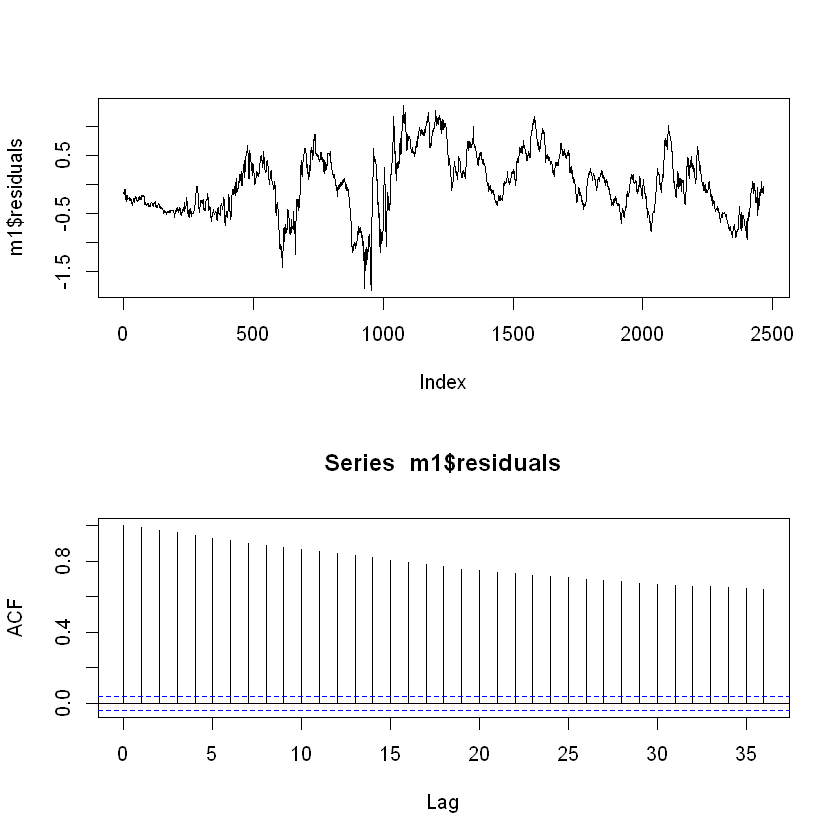

In [17]:
par(mfcol=c(2, 1))
plot(m1$residuals, type="l")
acf(m1$residuals, lag=36)

残差时序图和残差ACF显示模型是严重不充分的。特别地，残差的样本ACF图是高度显著的，并且缓慢衰减，显示出单位根非平稳时间序列的特点。

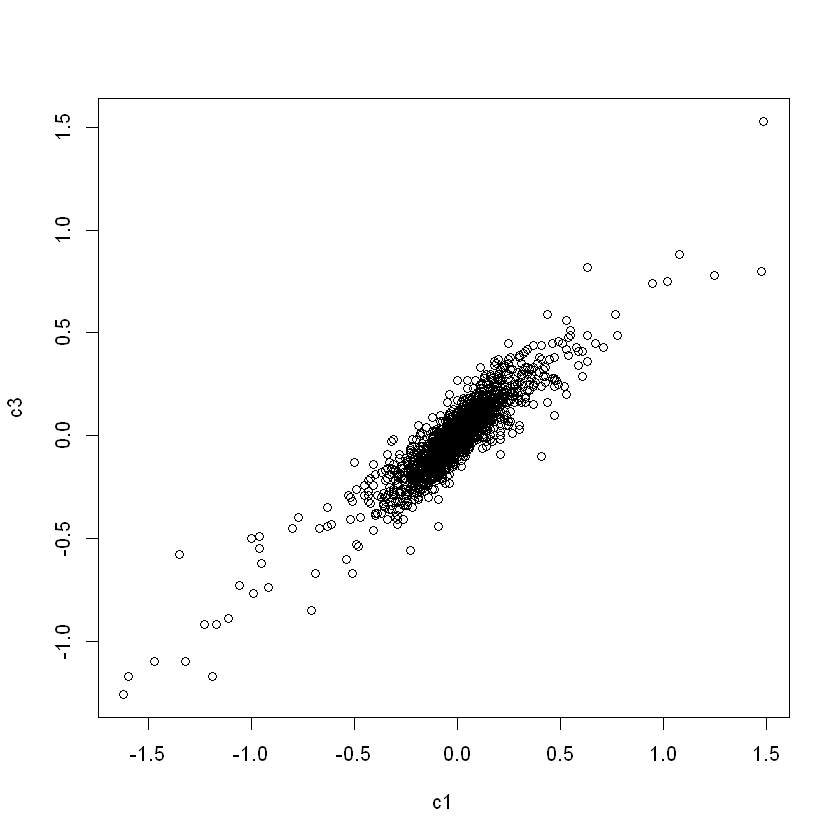

In [20]:
c1 = diff(r1)
c3 = diff(r3)
plot(c1, c3)

In [21]:
m2 = lm(c3 ~ c1)
summary(m2)


Call:
lm(formula = c3 ~ c1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42459 -0.03578 -0.00117  0.03467  0.48921 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0001051  0.0013890  -0.076     0.94    
c1           0.7919323  0.0073391 107.906   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06897 on 2464 degrees of freedom
Multiple R-squared:  0.8253,	Adjusted R-squared:  0.8253 
F-statistic: 1.164e+04 on 1 and 2464 DF,  p-value: < 2.2e-16


由上图的结果可知，截距项为0的假设被接受。

In [22]:
m2 = lm(c3 ~ -1 + c1)
summary(m2)


Call:
lm(formula = c3 ~ -1 + c1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42469 -0.03589 -0.00127  0.03456  0.48911 

Coefficients:
   Estimate Std. Error t value Pr(>|t|)    
c1 0.791935   0.007337   107.9   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06896 on 2465 degrees of freedom
Multiple R-squared:  0.8253,	Adjusted R-squared:  0.8253 
F-statistic: 1.165e+04 on 1 and 2465 DF,  p-value: < 2.2e-16


由结果可知
$$
c_{3t}=0.792c_{1t}+e_t,\qquad \hat{\sigma}_e=0.0690
$$
其中$R^2=82.53%$，此模型进一步证实了两种利率之间很强的线性相关性。

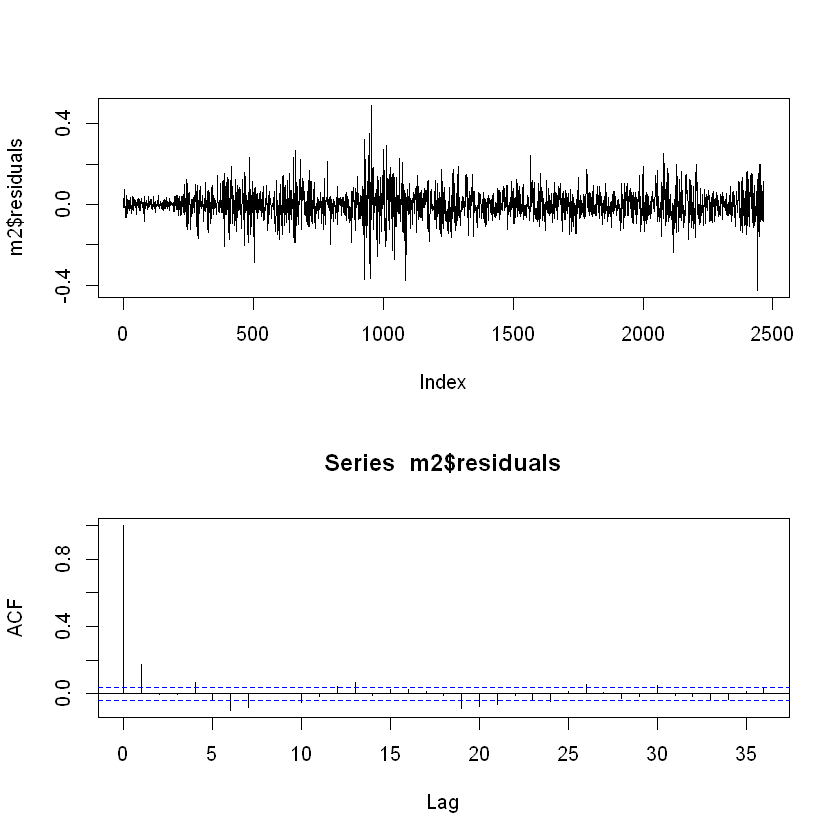

In [23]:
par(mfcol=c(2, 1))
plot(m2$residuals, type="l")
acf(m2$residuals, lag=36)

从样本ACF看出，MA(1)模型对残差序列是适合的，把线性回归模型改为
$$
c_{3t}=\beta c_{1t} + e_{t}, \qquad e_t=a_t-\theta_1a_{t-1}
$$
其中${a_t}$是一个白噪声序列。

In [52]:
t.test(c3)


	One Sample t-test

data:  c3
t = -0.28679, df = 2465, p-value = 0.7743
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.007468847  0.005562926
sample estimates:
    mean of x 
-0.0009529603 


In [26]:
m3 = arima(c3, order=c(0, 0, 1), xreg=c1, include.mean=F)
m3


Call:
arima(x = c3, order = c(0, 0, 1), xreg = c1, include.mean = F)

Coefficients:
         ma1      c1
      0.1823  0.7936
s.e.  0.0196  0.0075

sigma^2 estimated as 0.0046:  log likelihood = 3136.62,  aic = -6267.23

所拟合的模型为
$$
c_{3t}=0.794c_{1t}+e_t, \qquad e_t=a_t+0.1823a_{t-1}
$$

In [28]:
rsq = (sum(c3^2) - sum(m3$residuals^2)) / sum(c3^2)
rsq

[1] 0.8310077

其中$R^2=83.1%$。        
综上所述，该模型表明两个周利率序列有如下线性关系：
$$
x_{3t}=x_{3,t-1}+0.794(x_{1t}-x_{1,t-1})+a_t+0.1823a_{t-1}
$$

**小结**             
我们给出分析带时间序列误差的线性回归模型的一般步骤：     
（1）拟合一个线性回归模型并检验其残差的前后相关性。             
（2）如果残差序列是单位根非平稳的，则对因变量和解释变量都做一阶差分。然后对两个差分后的序列进行第1步。若这时的残差序列是平稳的，则对残差序列识别一个ARMA模型并相应地修改线性回归模型。             
（3）用最大似然法进行联合估计，并对模型进行检验，查看是否需要进一步改进。        
为检验残差的前后相关性，推荐使用Ljung-Box统计量，而不使用Durbin-Watson(DW)统计量，因为后者只考虑到滞后阶数为1的前后相关性。

## 长记忆模型

长记忆时间序列的一个例子就是如下定义的**分数差分序列**:
$$
(1-B)^d x_t=a_t, \quad -0.5<d<0.5
$$
其中$a_{t}$是一个白噪声。      
在实际中，如果一个时间序列的样本ACF在数值上不大，但衰减得很慢，则该序列可能有长记忆。    
我们考虑CRSP价值加权指数从1970年1月2日到2008年12月31日的绝对日收益率。

In [31]:
library(fracdiff)
da = read.table("data/d-ibm3dx7008.txt", header=T)
head(da)

Date,rtn,vwretd,ewretd,sprtrn
19700102,0.000686,0.012137,0.033450,0.010211
19700105,0.009596,0.006375,0.018947,0.004946
19700106,0.000679,-0.007233,-0.005776,-0.006848
19700107,0.000678,-0.001272,0.003559,-0.002047
19700108,0.002034,0.000564,0.002890,0.000540
19700109,-0.001353,-0.002797,-0.002923,-0.003021


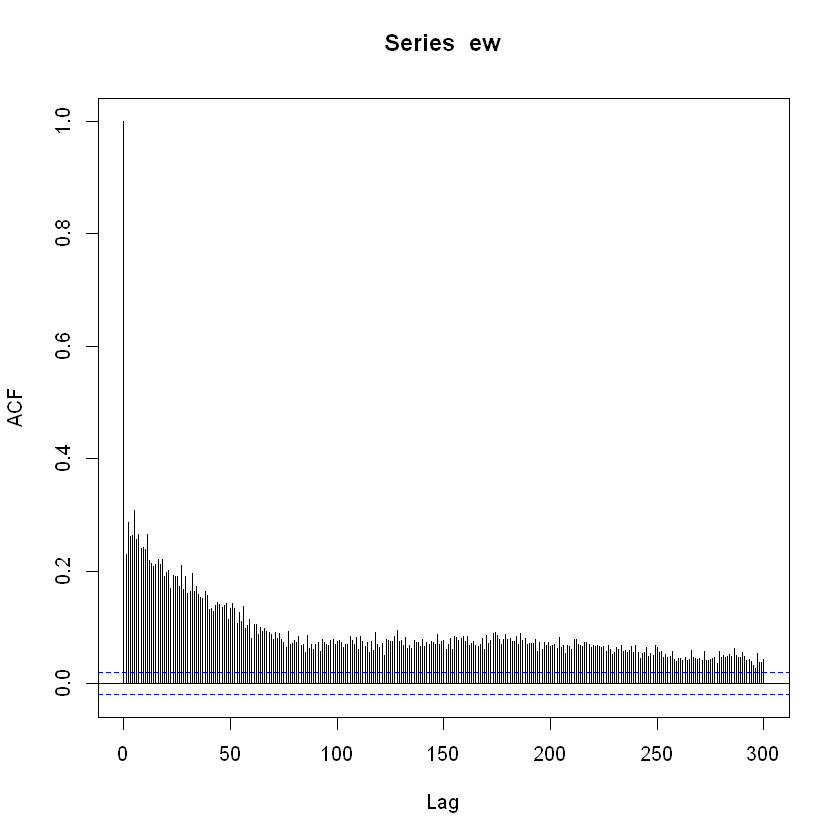

In [40]:
ew = abs(da$vwretd)
acf(ew, lag=300)

In [32]:
m3 = fdGPH(ew)
m3

$d
[1] 0.372226

$sd.as
[1] 0.0698385

$sd.reg
[1] 0.06868857

把该序列作为纯分数差分过程并应用Geweke-Porter-Hudak方法，我们得到$\hat{d}=0.372$，标准误差为0.070。

In [33]:
m2 = fracdiff(ew, nar=1, nma=1)
summary(m2)


Call:
  fracdiff(x = ew, nar = 1, nma = 1) 

Coefficients:
   Estimate Std. Error z value Pr(>|z|)    
d  0.490938   0.007997   61.39   <2e-16 ***
ar 0.113389   0.005988   18.94   <2e-16 ***
ma 0.575895   0.005946   96.85   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
sigma[eps] = 0.0065619 
[d.tol = 0.0001221, M = 100, h = 0.0003742]
Log likelihood: 3.551e+04 ==> AIC = -71021.02 [4 deg.freedom]

## 模型比较与平均

In [41]:
da = read.table("data/q-gdpc96.txt", header=T)
head(da)

Year,Mon,Day,gdp
1947,1,1,1772.204
1947,4,1,1769.486
1947,7,1,1768.032
1947,10,1,1794.842
1948,1,1,1823.365
1948,4,1,1856.930


In [42]:
gdp = log(da$gdp)
dgdp = diff(gdp)

为什么这个不可以用AR(1)模型直接拟合呢？     
MA模型主要应用在时间序列去掉趋势的时候，AR模型对数据走势有什么偏好吗？如果数据呈现上升走势，可以使用AR模型拟合吗？

In [72]:
m1 = ar(gdp, type="mle")
m1$order

[1] 1

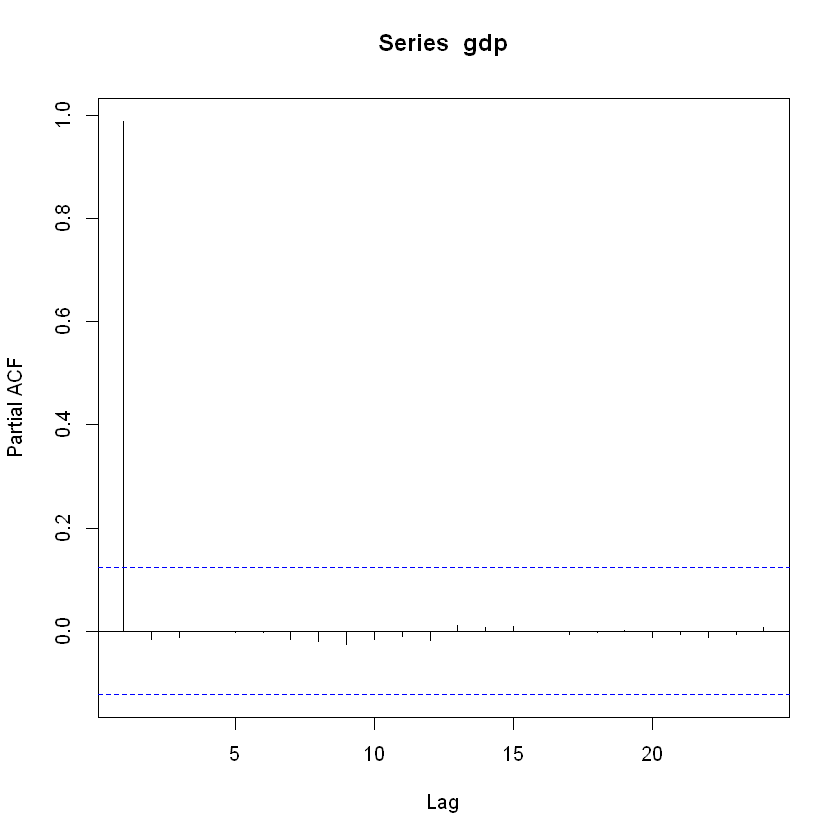

In [73]:
pacf(gdp)

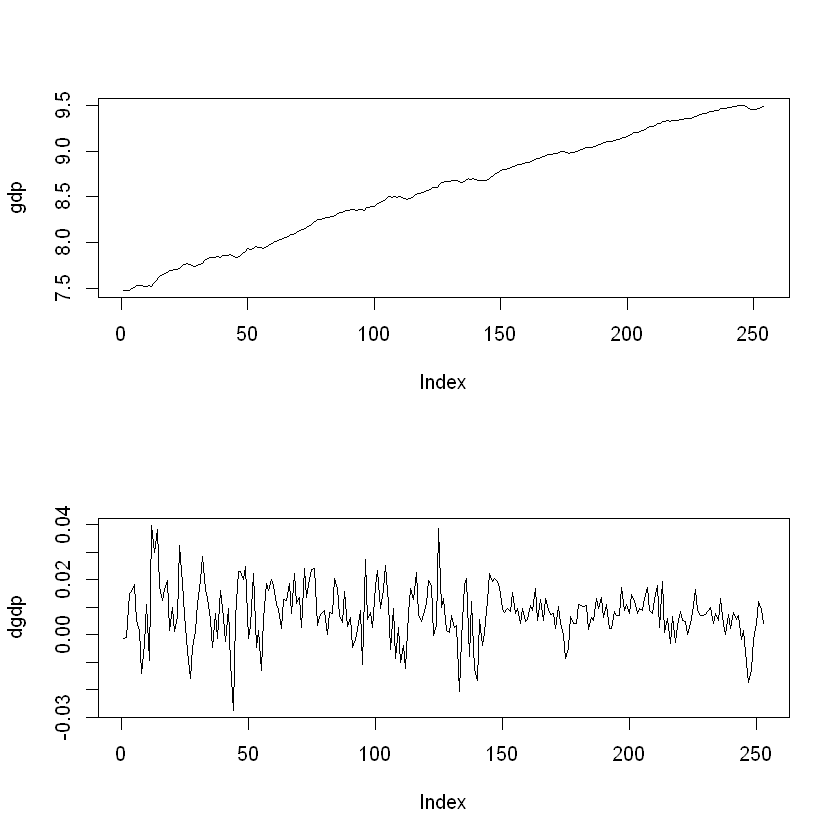

In [49]:
par(mfcol=c(2, 1))
plot(gdp, type="l")
plot(dgdp, type="l")

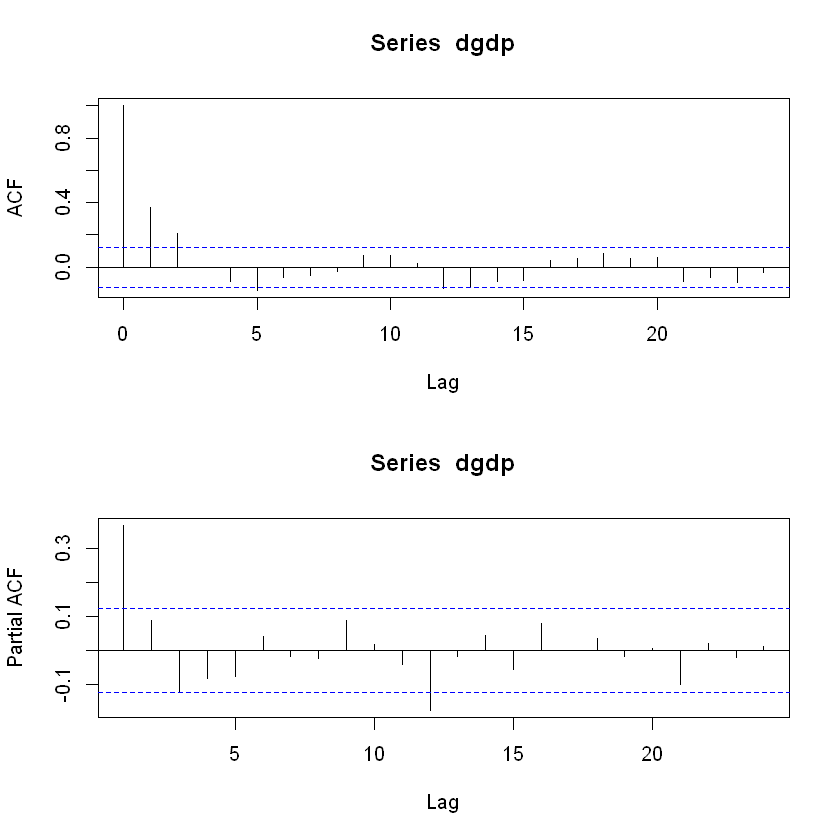

In [50]:
par(mfcol=c(2, 1))
acf(dgdp, lag=24)
pacf(dgdp, lag=24)

In [43]:
m1 = ar(dgdp, method="mle")
m1$order

[1] 3

In [52]:
t.test(dgdp)


	One Sample t-test

data:  dgdp
t = 12.689, df = 252, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.006702717 0.009165648
sample estimates:
  mean of x 
0.007934182 


In [51]:
m2 = arima(dgdp, order=c(3, 0, 0))
m2


Call:
arima(x = dgdp, order = c(3, 0, 0))

Coefficients:
         ar1     ar2      ar3  intercept
      0.3462  0.1299  -0.1225     0.0079
s.e.  0.0623  0.0655   0.0624     0.0009

sigma^2 estimated as 8.323e-05:  log likelihood = 829.23,  aic = -1648.45

拟合的AR(3)模型为
$$
(1-0.346B-0.130B^2+0.123B^3)(x_t-0.0079)=a_t
$$

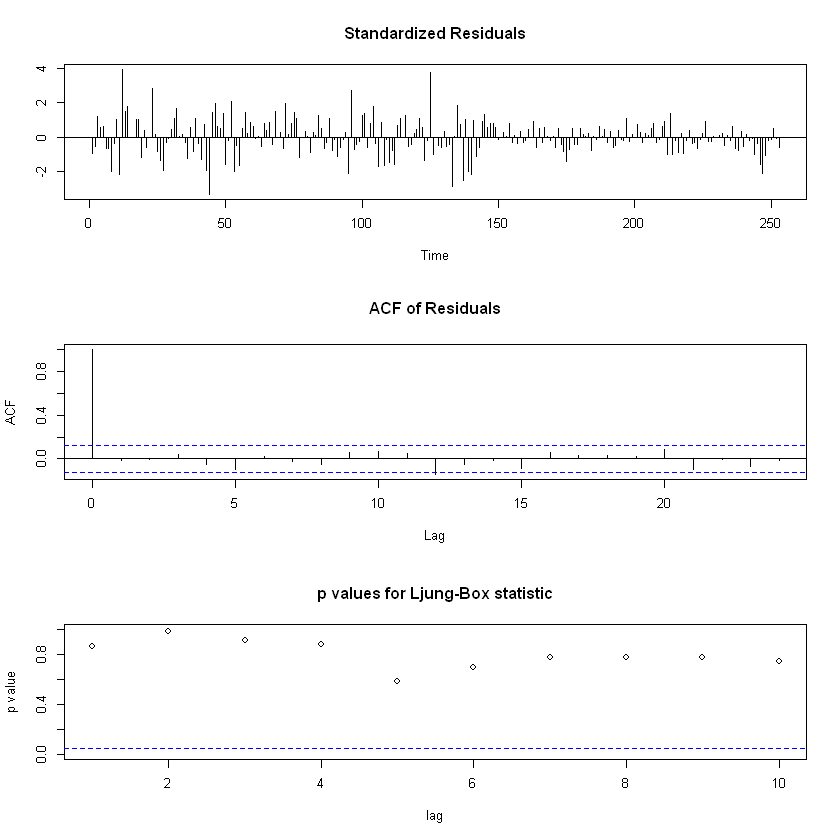

In [69]:
tsdiag(m2, gol=24)

In [45]:
m3 = arima(dgdp, order=c(3, 0, 0), season=list(order=c(1, 0, 1), period=4))
m3


Call:
arima(x = dgdp, order = c(3, 0, 0), seasonal = list(order = c(1, 0, 1), period = 4))

Coefficients:
         ar1     ar2      ar3    sar1     sma1  intercept
      0.3305  0.1521  -0.1103  0.4966  -0.5865     0.0079
s.e.  0.0633  0.0668   0.0635  0.2578   0.2357     0.0008

sigma^2 estimated as 8.24e-05:  log likelihood = 830.47,  aic = -1646.93

季节模型
$$
(1-0.3305B-0.1521B^2+0.1103B^3)(1-0.4966B^4)(x_t-0.0079)=(1-0.5965B^4)a_t
$$

In [46]:
source("backtest.R")
mm2 = backtest(m2, dgdp, 215, 1)

[1] "RMSE of out-of-sample forecasts"
[1] 0.006153102
[1] "Mean absolute error of out-of-sample forecasts"
[1] 0.004430387


In [47]:
mm3 = backtest(m3, dgdp, 215, 1)

[1] "RMSE of out-of-sample forecasts"
[1] 0.006322009
[1] "Mean absolute error of out-of-sample forecasts"
[1] 0.004553896


对于超前1步预测来说，预测误差的平方根和平均绝对预测误差都说明AR(3)模型比季节模型好。